### Problem Formulation
- In this example, I want to investigate "what factors/variables affect the performance of revenue"
- My aim is to go back to the business and make suggestions about how to generate more revenue
- Make Revenue predictions given specific variable values
- Hence my Dependent variable (y) is Revenue

#### 1.Importing packages

In [60]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

#### 2.Loading data

In [61]:
raw_data= pd.read_csv('Marketing_Raw_Data.csv')

print(raw_data.shape)

raw_data.head()

(185, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


## 3.Data Preprocessing

#### Exploratory data analysis

In [62]:
# Checking for null values

raw_data.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [63]:
# Visualize the NULL observations


raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Week'])

# Printing the shape
raw_data.shape

# Visualize the NULL observations
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [65]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [1.000000 2.000000 3.000000 4.000000 5.000000 11.000000 12.000000]
The number of values for feature Month_ID :7 -- [11.000000 12.000000 13.000000 14.000000 15.000000 16.000000 17.000000]
The number of values for feature Year :2 -- [2020.000000 2021.000000]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


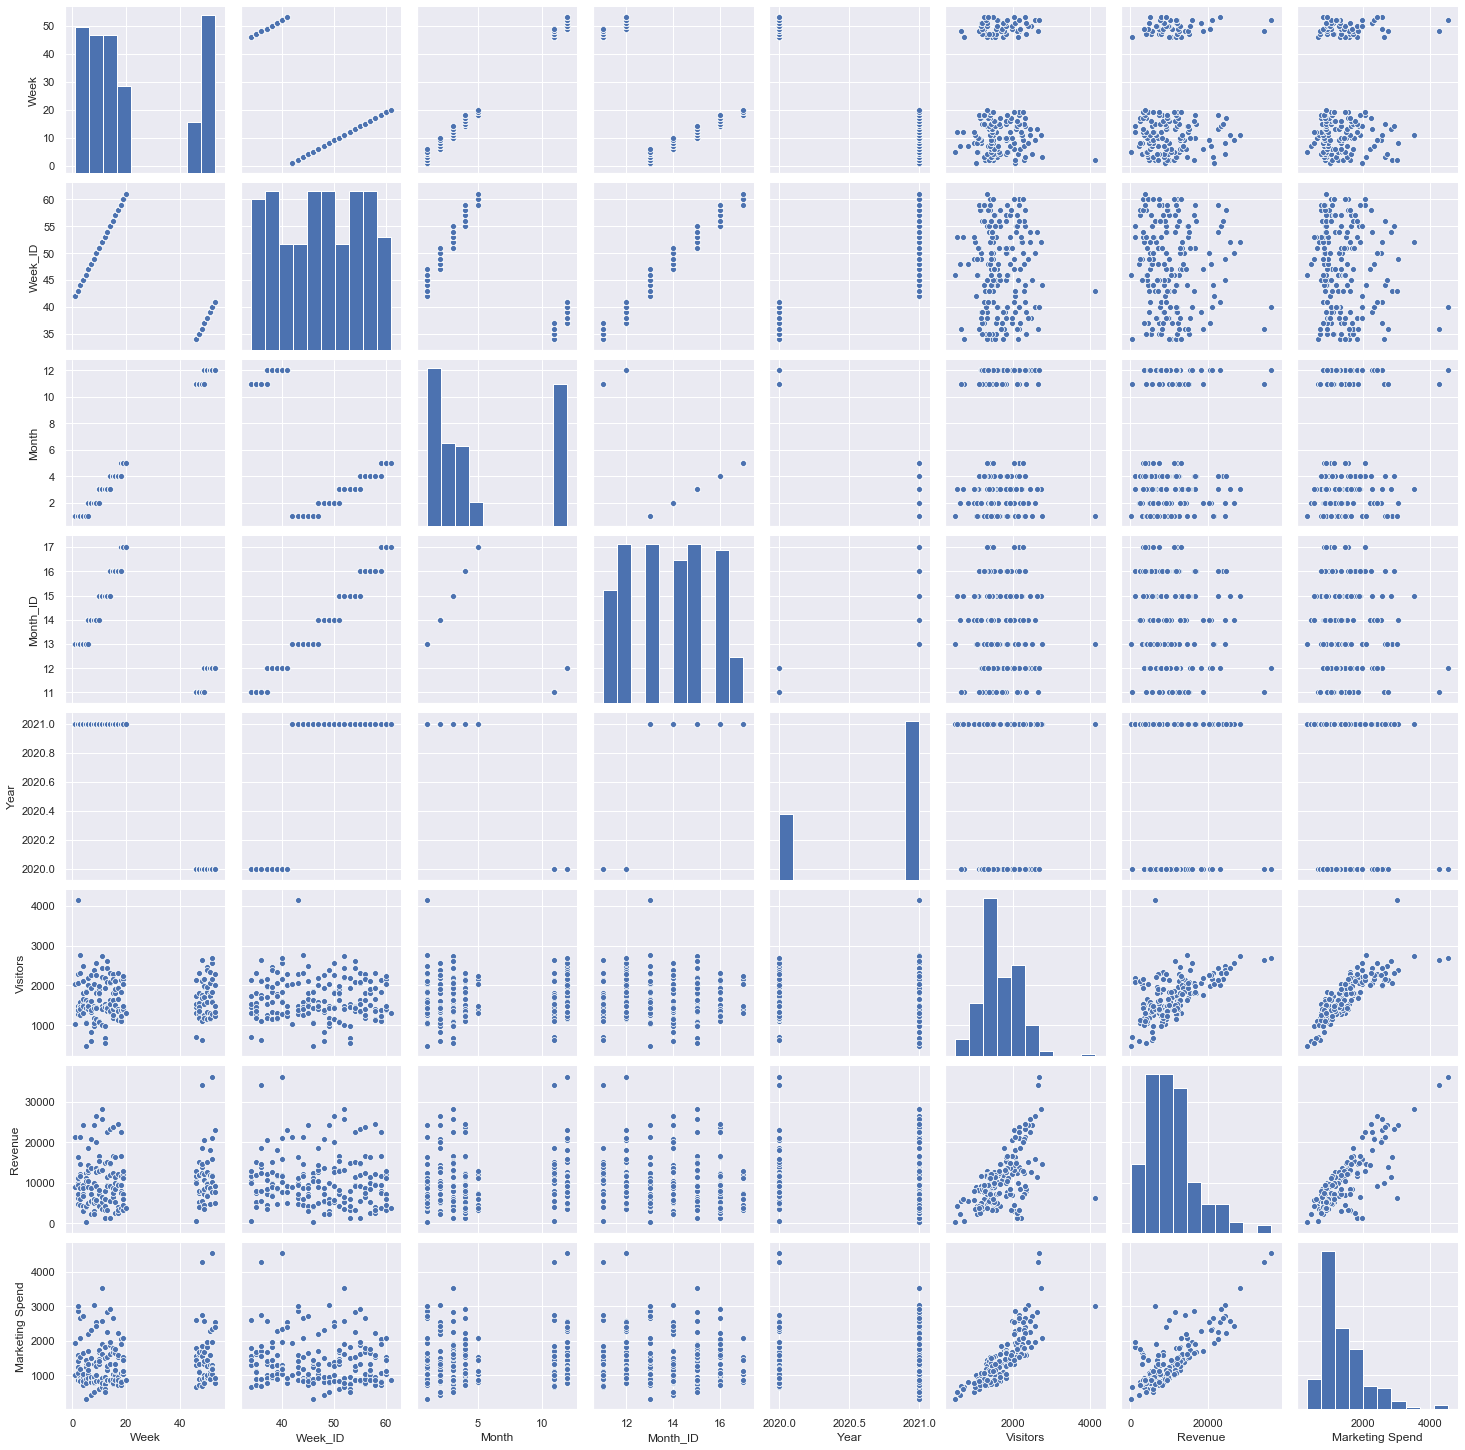

In [66]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

In [67]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

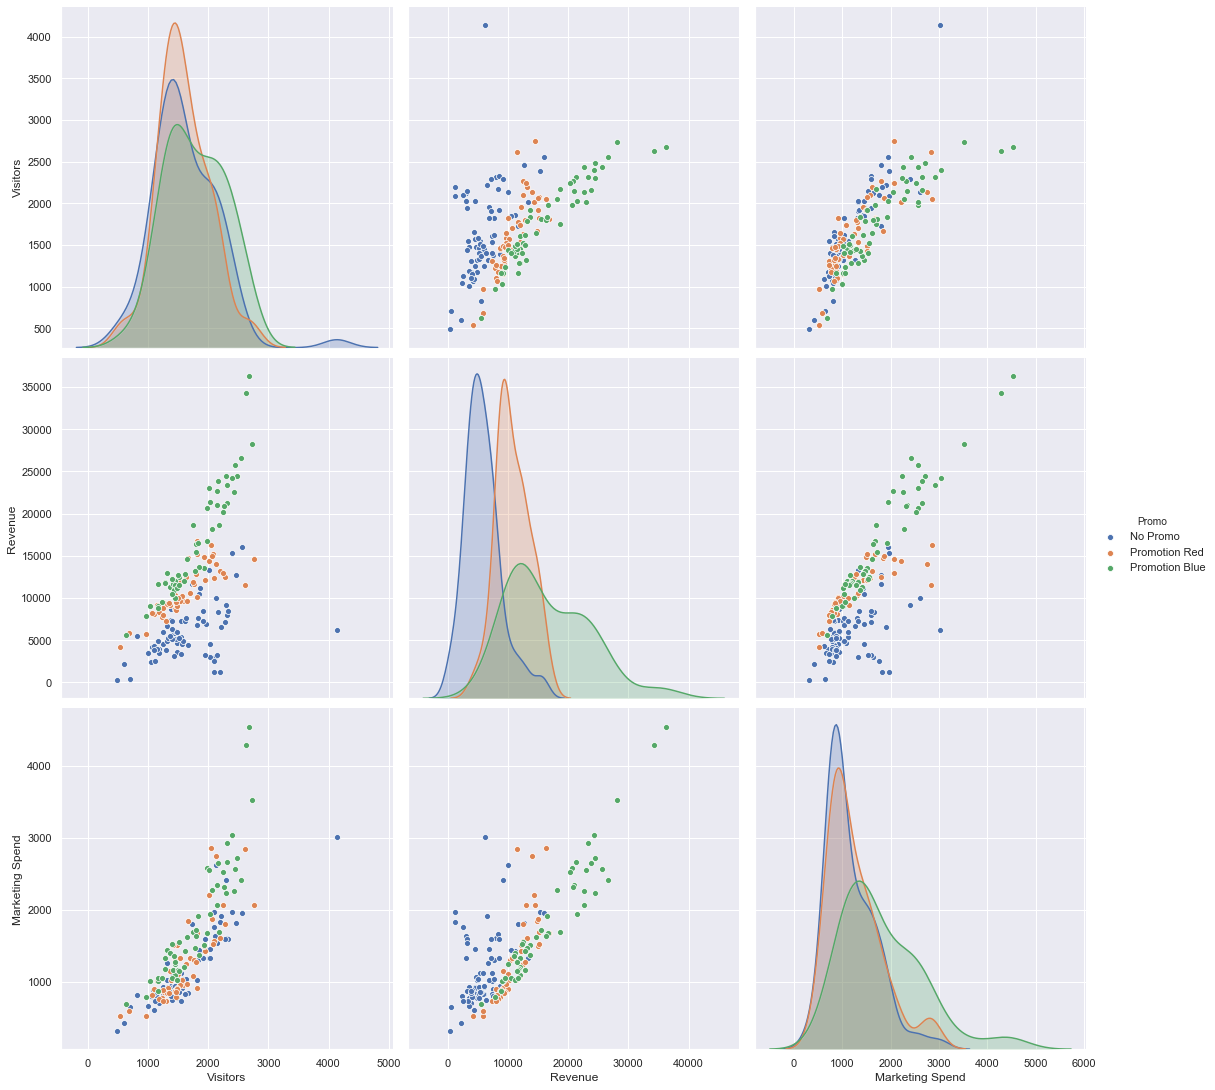

In [68]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

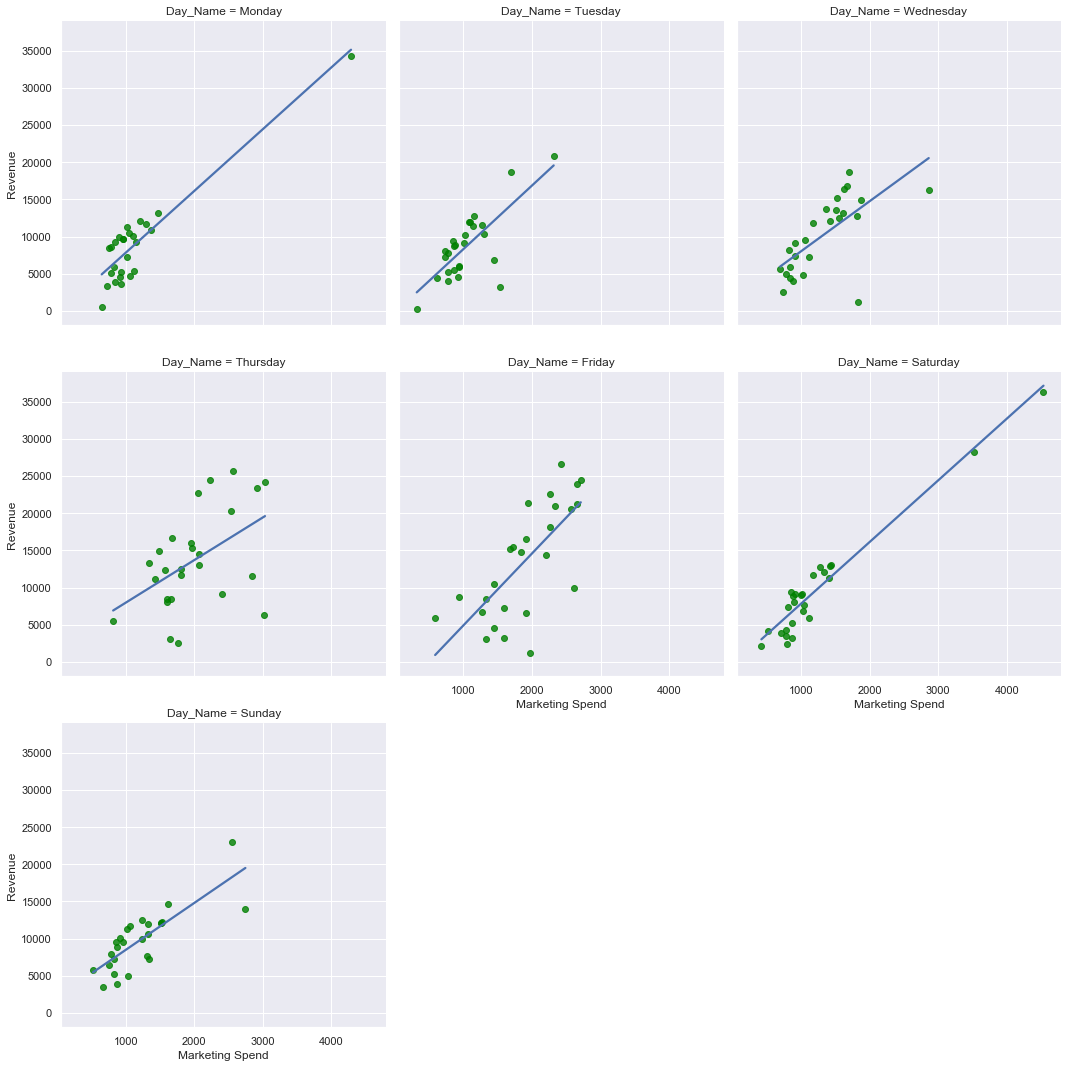

In [69]:
# Visualising a Subset of our data - important features

g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

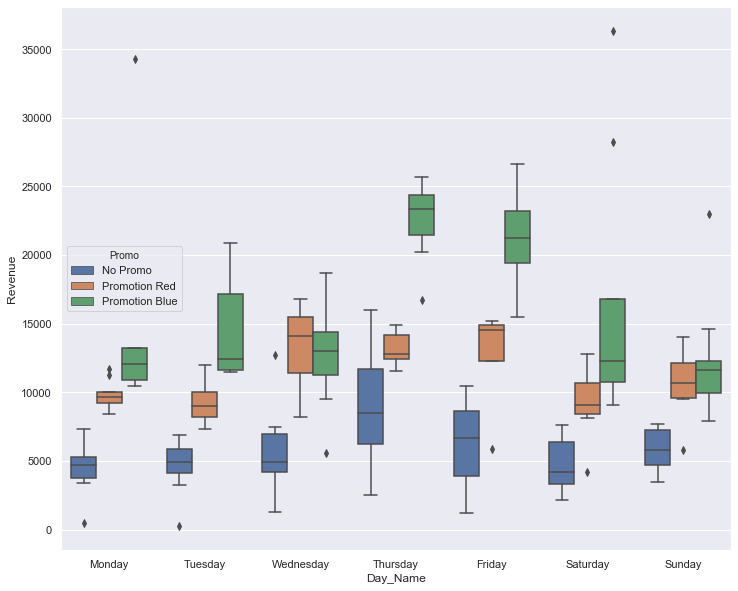

In [70]:
g = sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo')

#### Data Cleaning

In [71]:
# Deleting outliers

raw_data = raw_data[raw_data['Revenue'] < 27000]

raw_data.shape

(179, 11)

In [72]:
# Column names
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [73]:
# Selecting usefull columns only
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

#visualize the raw data
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [74]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])

new_raw_data.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


### Feature selection

In [75]:

# Running Correlation

hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr()

#### Note:
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- 0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation

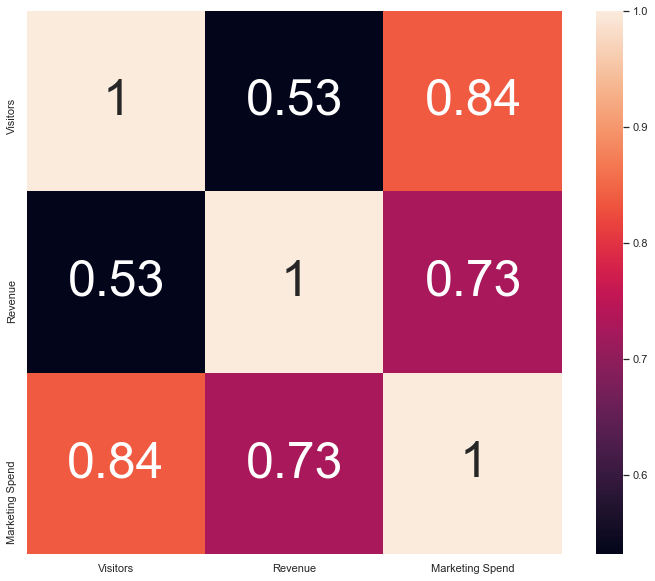

In [76]:
# Visualizing Correlation with a Heatmap

g = sns.heatmap(hm, annot = True, annot_kws={'size':50})

### Running Feature importance

In [77]:
# Split the data into X & y

X = new_raw_data.drop('Revenue', axis = 1).values
X2 = new_raw_data.drop('Revenue', axis = 1)
y = new_raw_data['Revenue']

print(X.shape)
print(y.shape)

X

(179, 12)
(179,)


array([[707.000000, 651.375000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1455.000000, 1298.250000, 0.000000, ..., 0.000000, 1.000000,
        0.000000],
       [1520.000000, 1559.375000, 0.000000, ..., 0.000000, 0.000000,
        1.000000],
       ...,
       [2023.000000, 1450.200000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1483.000000, 1121.875000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1303.000000, 871.000000, 1.000000, ..., 0.000000, 0.000000,
        0.000000]])

In [79]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [80]:
# Running Feature Importance

for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Visitors is: 0.332
The feature importance for Marketing Spend is: 0.438
The feature importance for Promo_No Promo is: 0.032
The feature importance for Promo_Promotion Blue is: 0.047
The feature importance for Promo_Promotion Red is: 0.045
The feature importance for Day_Name_Friday is: 0.013
The feature importance for Day_Name_Monday is: 0.014
The feature importance for Day_Name_Saturday is: 0.013
The feature importance for Day_Name_Sunday is: 0.016
The feature importance for Day_Name_Thursday is: 0.020
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.013


## 4. Hold-out validation

In [81]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 12)
(36, 12)
(143,)
(36,)


## 5.Running Linear Regression

In [82]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

## 6.Evaluating the Model

In [83]:

# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.791949990505602
The Accuracy n2  on the training dataset is:  0.791949990505602

The Accuracy  on the testing dataset is:  0.7511903865386681

The RMSE  on the training dataset is:  2618.561282656437
The RMSE  on the testing dataset is:  2340.4200873490113

The MAE  on the training dataset is:  1928.0670665528867
The MAE  on the testing dataset is:  1692.383557716229

Coefficients:  [0.972169 3.695615 -4295.876540 3724.690590 571.185949 738.005738
 -352.308895 -902.241594 -155.867567 814.821481 150.084913 -292.494076]

Intercept:  4060.6503664996962


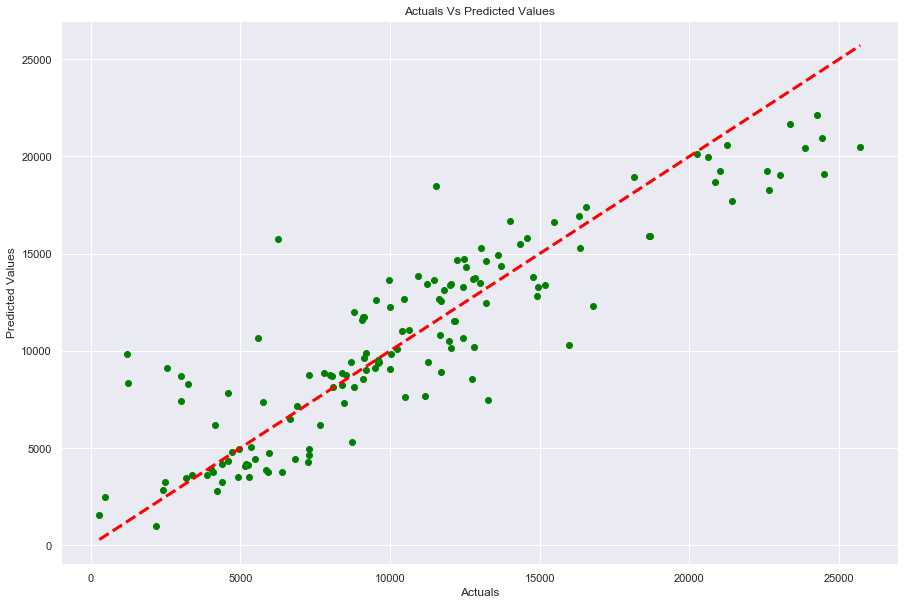

In [84]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
plt.show()

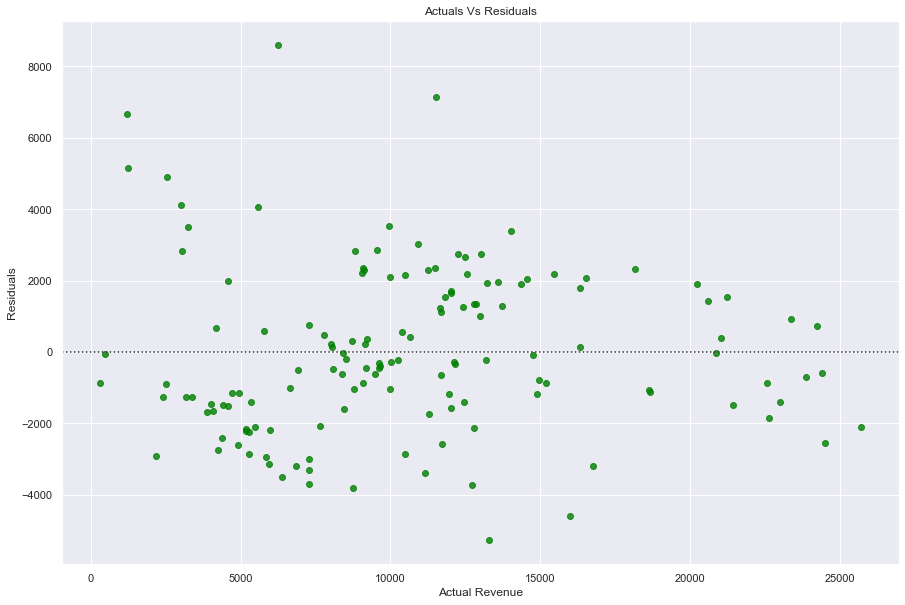

In [85]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')
plt.show()

In [86]:
X2.columns

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

## 7.Using Linear Regression model to make prediction

In [87]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,12)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [97]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = intercert+ sum(features(i)*coefficients(i)) [ith features]

# Prediction Calculator
pred1 = ((lm.intercept_) + (float(Coeff_df.loc[0,Day]) * 1) + (float(Coeff_df.loc[0,'Visitors']) * Visitors) + (float(Coeff_df.loc[0,'Marketing Spend']) * Marketing_Spend) + (float(Coeff_df.loc[0,Promo]) * 1))

print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  31625.267849885437
